# **Waze Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your team is still in the early stages of their user churn project. So far, you’ve completed a project proposal and used Python to inspect and organize Waze’s user data.

You check your inbox and notice a new message from Chidi Ga, your team’s Senior Data Analyst. Chidi is pleased with the work you have already completed and requests your assistance with exploratory data analysis (EDA) and further data visualization. Harriet Hadzic, Waze's Director of Data Analysis, will want to review a Python notebook that shows your data exploration and visualization.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis.
<br/>

**The purpose** of this project is to conduct exploratory data analysis (EDA) on a provided dataset.

**The goal** is to continue the examination of the data that you began in the previous Course, adding relevant visualizations that help communicate the story that the data tells.
<br/>


*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluating and sharing results

# **Visualize the data's story**

### **Task 1. Imports and data loading**

For EDA of the data, we need to import the data and packages that will be most helpful, such as pandas, numpy, and matplotlib.




In [1]:
# Import the necessary packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Then, we read in the data and store it as a dataframe object called df.

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')


**Consider the questions in your PACE Strategy Document and those below where applicable to complete your code:**
1. Does the data need to be restructured or converted into usable formats?

2. Are there any variables that have missing data?


**Answer:**    
1) Our data are already structured and ready for analysis as each row represents one user.  

2) We know from our previous analysis of this dataset that we have 700 rows of missing values in the 'label' variable. We didn't manage to find any patterns that could identify a reason for those missing data by observing a different behavior of the unlabeled observations.

### **Task 2. Data exploration and cleaning**

**Consider the following questions:**



1.  Given the scenario, which data columns are most applicable?

2.  Which data columns can you eliminate, knowing they won’t solve your problem scenario?

3.  How would you check for missing data? And how would you handle missing data (if any)?

4.  How would you check for outliers? And how would handle outliers (if any)?







**Answer:**  
1) Every variable that could interpret the user's behavior and reveal insights that could explain the reason for a user to churn, applies to our scenario. The 'label' column is our main variable as it contains the boolean values that characterize a user as retained or churned. Other variables such as sessions, drives, activity_days, driving_days, etc. are the variables that we will use to try to find their correlation with the label status.
  
2) The variables 'total_navigations_fav1' and 'total_navigations_fav2' appear to be the least important among the others in terms of investigating the reasons that a customer may churn. Another variable that we could drop is the ID as it does not provide any relevant goal information so it has no use for our analysis.
  
3) First, I will scan my dataset for missing data by reviewing the .info() method to view the total number of rows and examine the rows of each variable to check if they have less than the total. Then, if any, I would extract the total NaNs per variable using the combination of methods .isna().sum(). The next step is to isolate the NaNs and try to find any information and patterns that would reveal a justified reason for the missing data, as we did in the project of course 2 during our data exploration and understanding. Finally, I need to choose how to address the missing data issue so they won't affect the results of my analysis. 
* The first approach would be to contact the owner of the data ask for justification and provide the missing values. 
* Another option would be, if the percentage of NaN values in comparison to the size of the dataset is small enough, to delete them by rows or columns (as it depends on the significance of the variable and the horizontal or vertical placement of the NaN values)
* Another way would be to derive new representative values as we could use the median or mean of the variable to fill the NaNs.
* The final option would be to check if it serves me to create a Dummy category for the missing values.

4) Again we have a variety of options to deal with outliers depending on the nature of the variable, the necessity of its existence, and the impact that they may have on our analysis. With that spoken, I could consider the following:
* If we are sure that the outliers are mistakes, typos, or errors and the dataset will be used for modeling or machine learning, then we are more likely to decide to delete outliers. To delete the outliers, we need to identify the lower and upper limits and filter out any values beyond their boundaries. 
* Reassign them by creating a floor & ceiling at a quantile, and then reassign every value above the ceiling and below the floor with the values that represent those boundaries.
* Another way to reassign outliers is to impute the average (median) value.
* Finally, if I am sure that those values would not affect my results I could just leave them in my dataset.

#### **Data overview and summary statistics**

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.size

194987

In [5]:
df.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,80.63,67.28,189.96,1749.84,121.61,29.67,4039.34,1860.98,15.54,12.18
std,4329.98,80.70,65.91,136.41,1008.51,148.12,45.39,2502.15,1446.70,9.00,7.82
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00
max,14998.00,743.00,596.00,1216.15,3500.00,1236.00,415.00,21183.40,15851.73,31.00,30.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64


**Question:**  
What are some ways to identify outliers?


**Answers**:  
We could check the mean and median values to identify the occurrence of outliers in our variables. A significant difference between those two stats reveals the existence of very large numbers if the mean is greater than the median, or abnormally small numbers if the mean is smaller than the median. Other than that, we could use a box plot to visualize our data and check the outcome for outliers.  

### **Task 3a. Visualizations**

Select data visualization types that will help you understand and explain the data.


We should begin by examining the spread and distribution of important variables using box plots and histograms.

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

In [8]:
df.sessions.describe().round(2)

count    14999.00
mean        80.63
std         80.70
min          0.00
25%         23.00
50%         56.00
75%        112.00
max        743.00
Name: sessions, dtype: float64

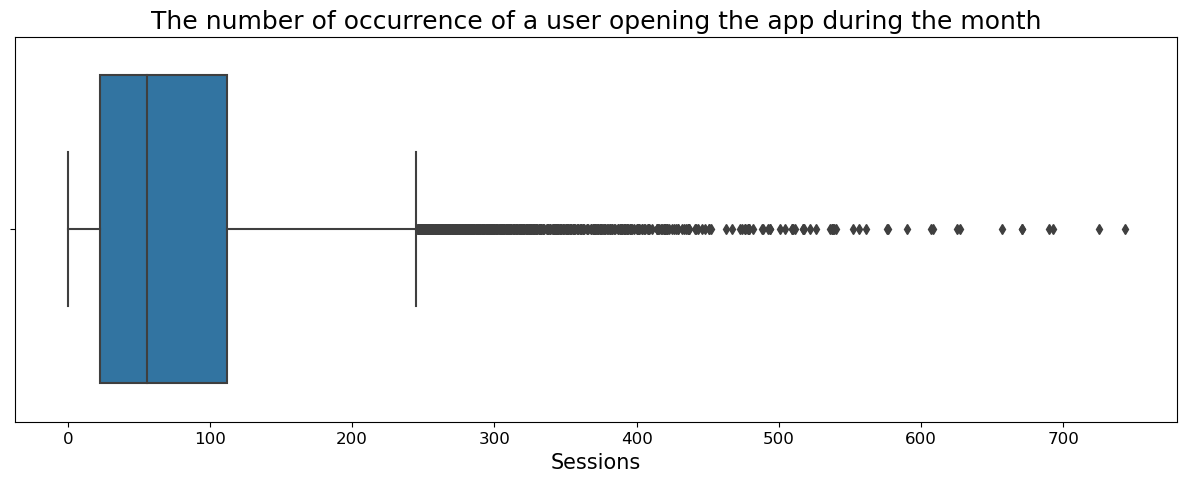

In [9]:
# Box plot
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x = 'sessions')
plt.title('The number of occurrence of a user opening the app during the month',fontsize=18)
plt.xlabel('Sessions',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

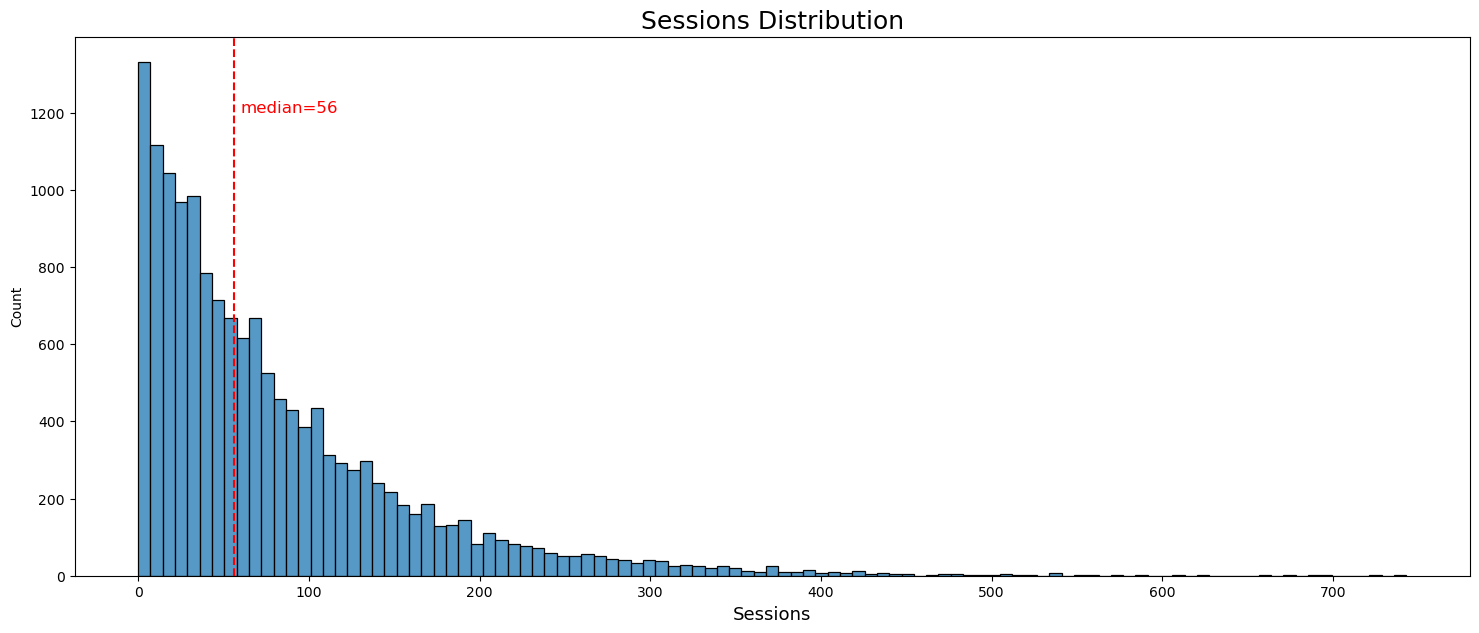

In [10]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='sessions')
plt.title('Sessions Distribution',fontsize=18)
plt.axvline(df['sessions'].median(),color='red',linestyle='--')
plt.text(60,1200,'median=56',color='red',fontsize=12)
plt.xlabel('Sessions',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

In [11]:
df.drives.describe().round(2)

count    14999.00
mean        67.28
std         65.91
min          0.00
25%         20.00
50%         48.00
75%         93.00
max        596.00
Name: drives, dtype: float64

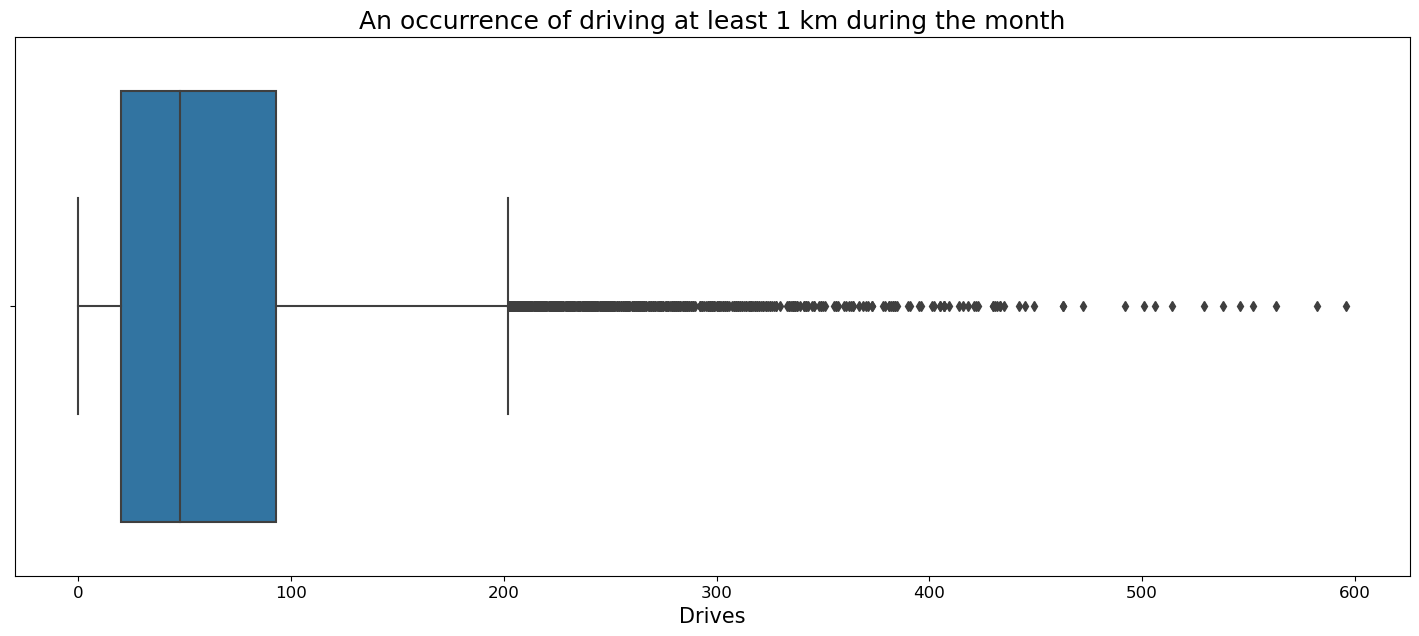

In [12]:
# Box plot
plt.figure(figsize=(18,7))
sns.boxplot(data=df, x= 'drives')
plt.title('An occurrence of driving at least 1 km during the month',fontsize=18)
plt.xlabel('Drives',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

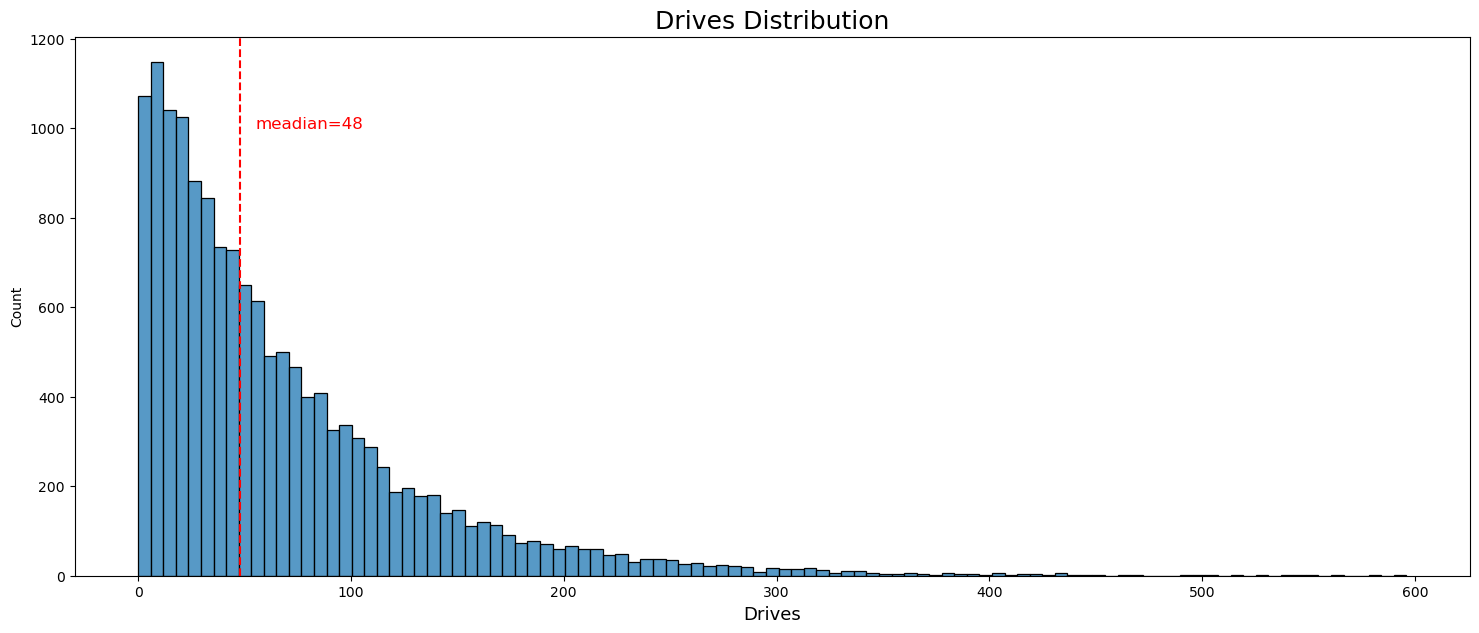

In [13]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='drives')
plt.title('Drives Distribution',fontsize=18)
plt.axvline(df['drives'].median(),color='red',linestyle='--')
plt.text(55,1000,'meadian=48',color='red',fontsize=12)
plt.xlabel('Drives',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

Let's check the relationship between 'sessions' & 'drives' with a regression line created by a jointplot

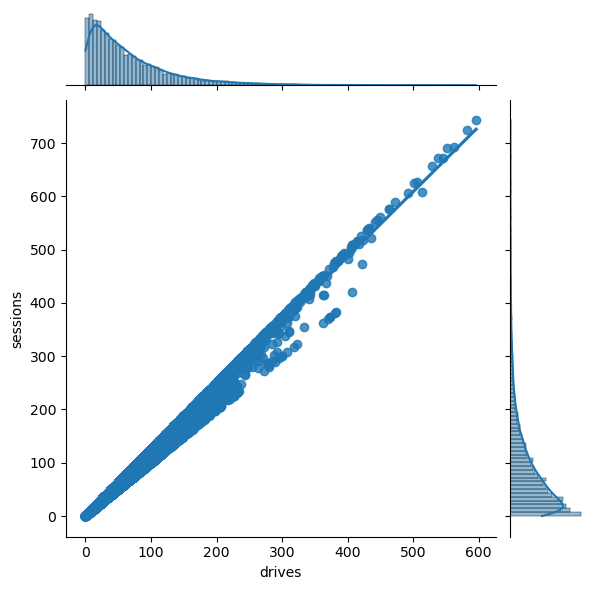

In [14]:
sns.jointplot(data=df, x='drives', y='sessions',kind='reg')
plt.show()

We can see a positive relationship between the two variables, indicating that while the one increases the other increases too. This result is kind of expected as 1 drive equals at least 1 session (but 1 or more sessions do not necessarily equal 1 drive).

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

In [15]:
df.total_sessions.describe().round(2)

count    14999.00
mean       189.96
std        136.41
min          0.22
25%         90.66
50%        159.57
75%        254.19
max       1216.15
Name: total_sessions, dtype: float64

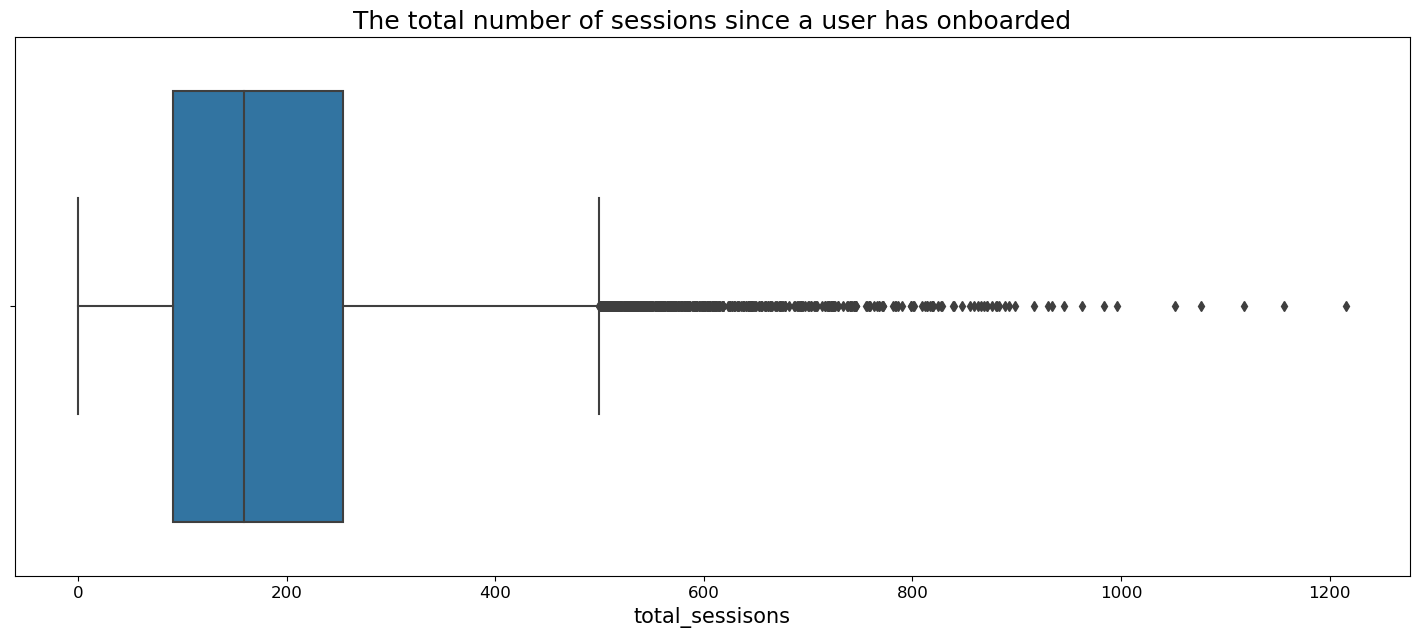

In [16]:
# Box plot
plt.figure(figsize=(18,7))
sns.boxplot(data=df, x= 'total_sessions')
plt.title('The total number of sessions since a user has onboarded',fontsize=18)
plt.xlabel('total_sessisons',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

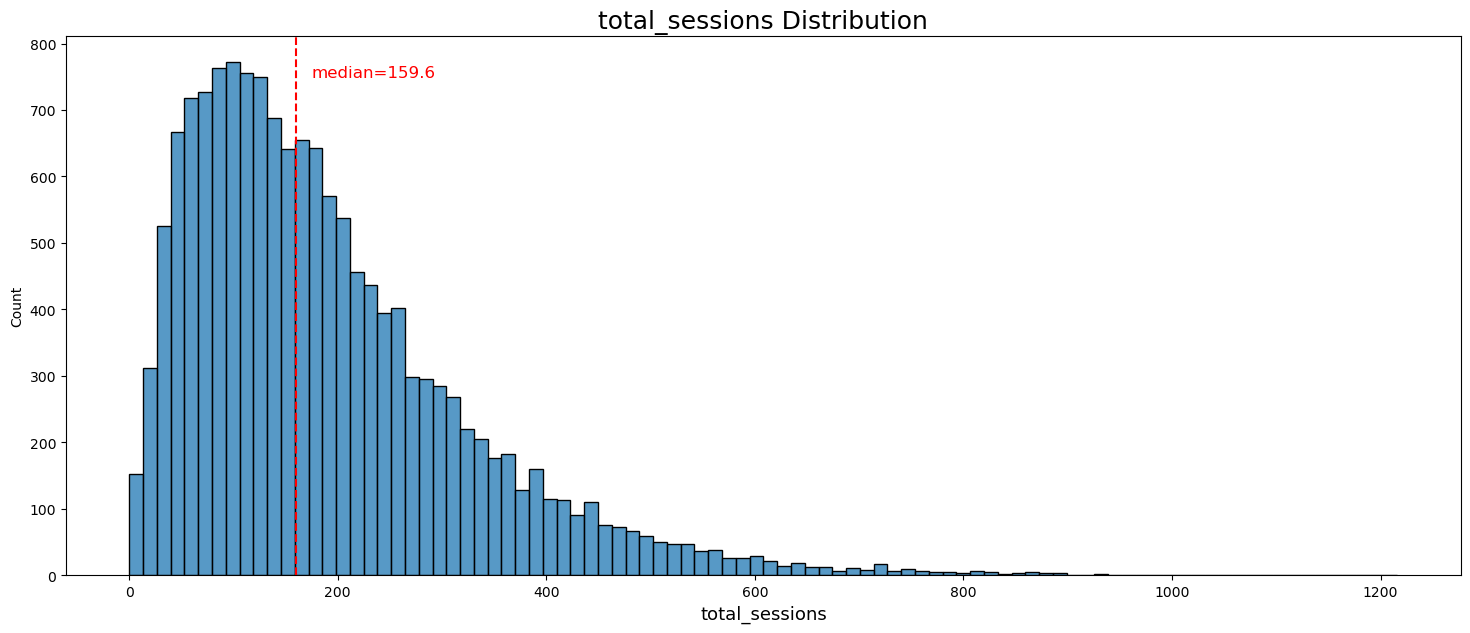

In [17]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='total_sessions')
plt.title('total_sessions Distribution',fontsize=18)
plt.axvline(df['total_sessions'].median(),color='red',linestyle='--')
plt.text(175,750,'median=159.6',color='red',fontsize=12)
plt.xlabel('total_sessions',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something we can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

In [18]:
df['n_days_after_onboarding'].describe().round(2)

count    14999.00
mean      1749.84
std       1008.51
min          4.00
25%        878.00
50%       1741.00
75%       2623.50
max       3500.00
Name: n_days_after_onboarding, dtype: float64

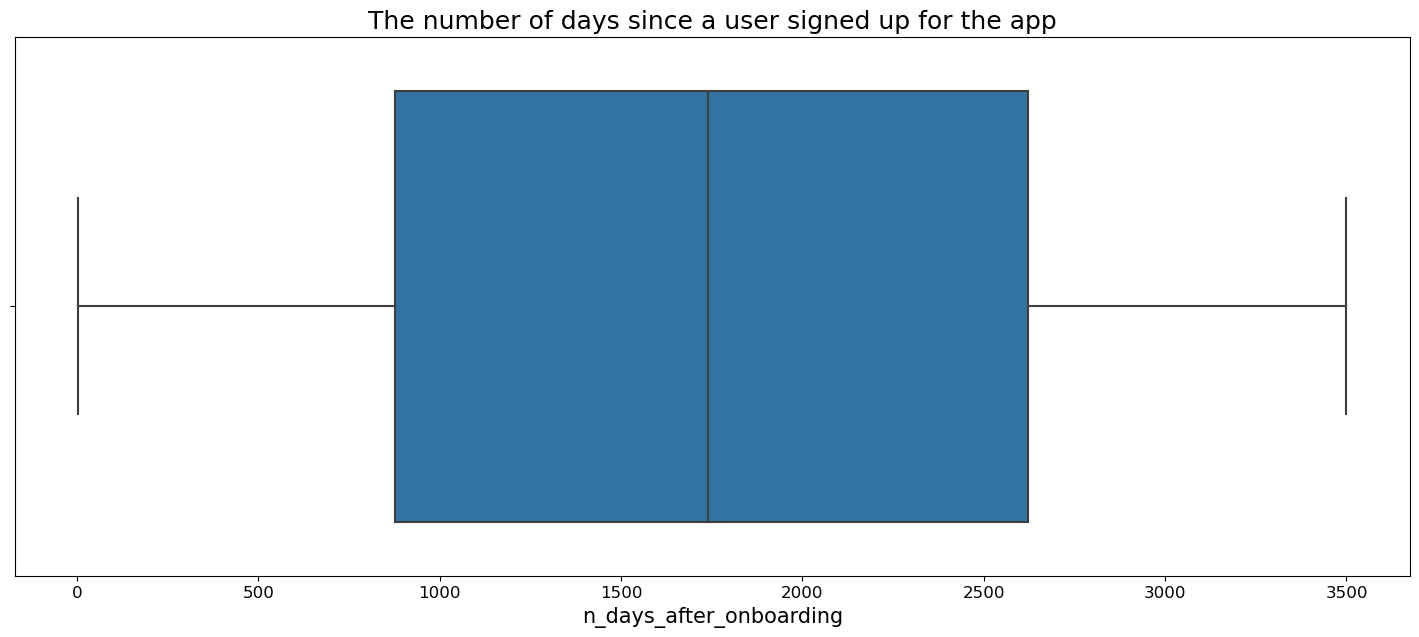

In [19]:
# Box plot
plt.figure(figsize=(18,7))
sns.boxplot(data=df, x= 'n_days_after_onboarding')
plt.title('The number of days since a user signed up for the app',fontsize=18)
plt.xlabel('n_days_after_onboarding',fontsize=15)
plt.xticks(fontsize=12)
plt.show()

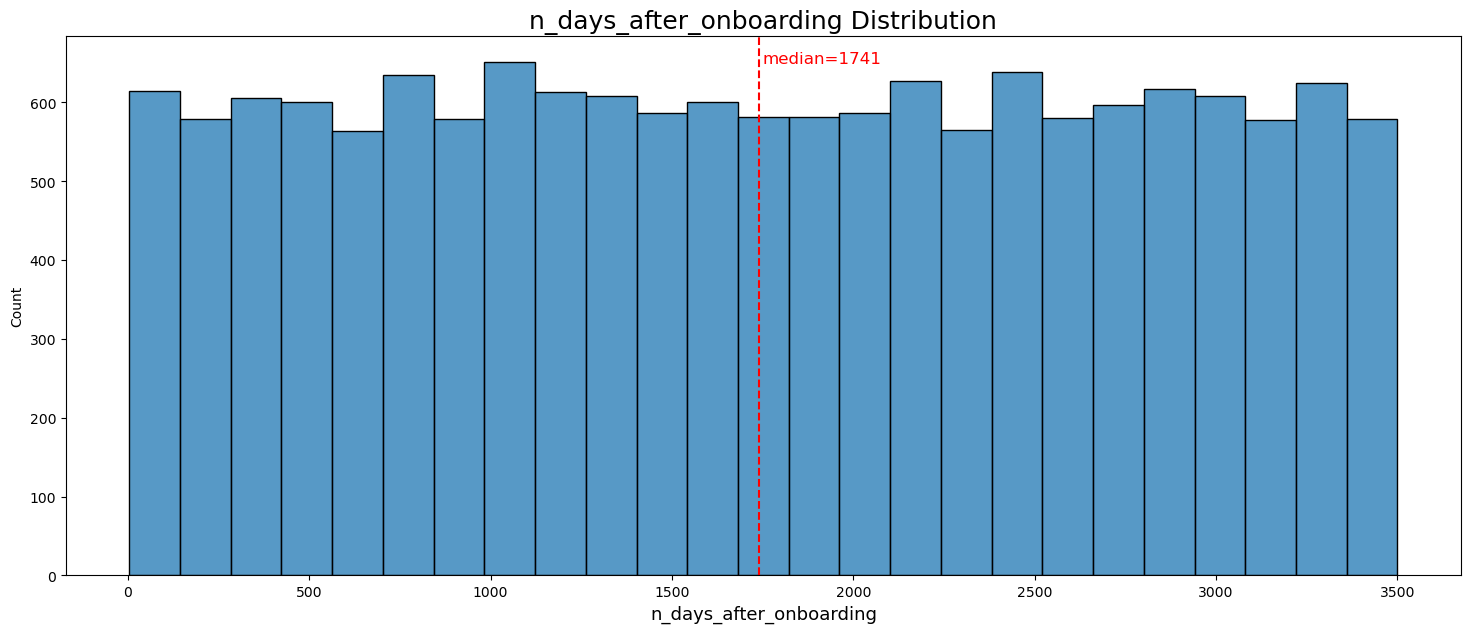

In [20]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='n_days_after_onboarding')
plt.title('n_days_after_onboarding Distribution',fontsize=18)
plt.axvline(df['n_days_after_onboarding'].median(),color='red',linestyle='--')
plt.text(1750,650,'median=1741',color='red',fontsize=12)
plt.xlabel('n_days_after_onboarding',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

In [21]:
df.driven_km_drives.describe().round(2)

count    14999.00
mean      4039.34
std       2502.15
min         60.44
25%       2212.60
50%       3493.86
75%       5289.86
max      21183.40
Name: driven_km_drives, dtype: float64

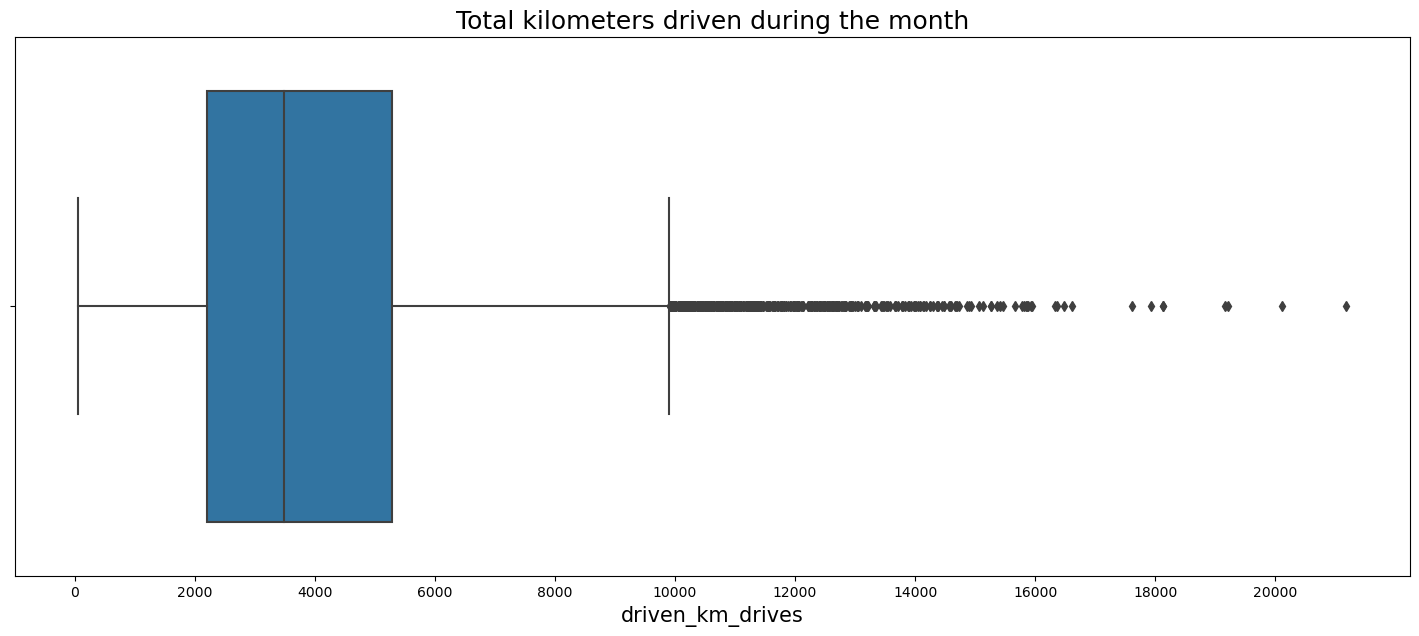

In [22]:
# Box plot
min_value = int(df['driven_km_drives'].min())
max_value = int(df['driven_km_drives'].max())
step = 2000

plt.figure(figsize=(18,7))
sns.boxplot(data=df, x= 'driven_km_drives')
plt.title('Total kilometers driven during the month',fontsize=18)
plt.xlabel('driven_km_drives',fontsize=15)
plt.xticks(range(0,max_value,step))
plt.show()

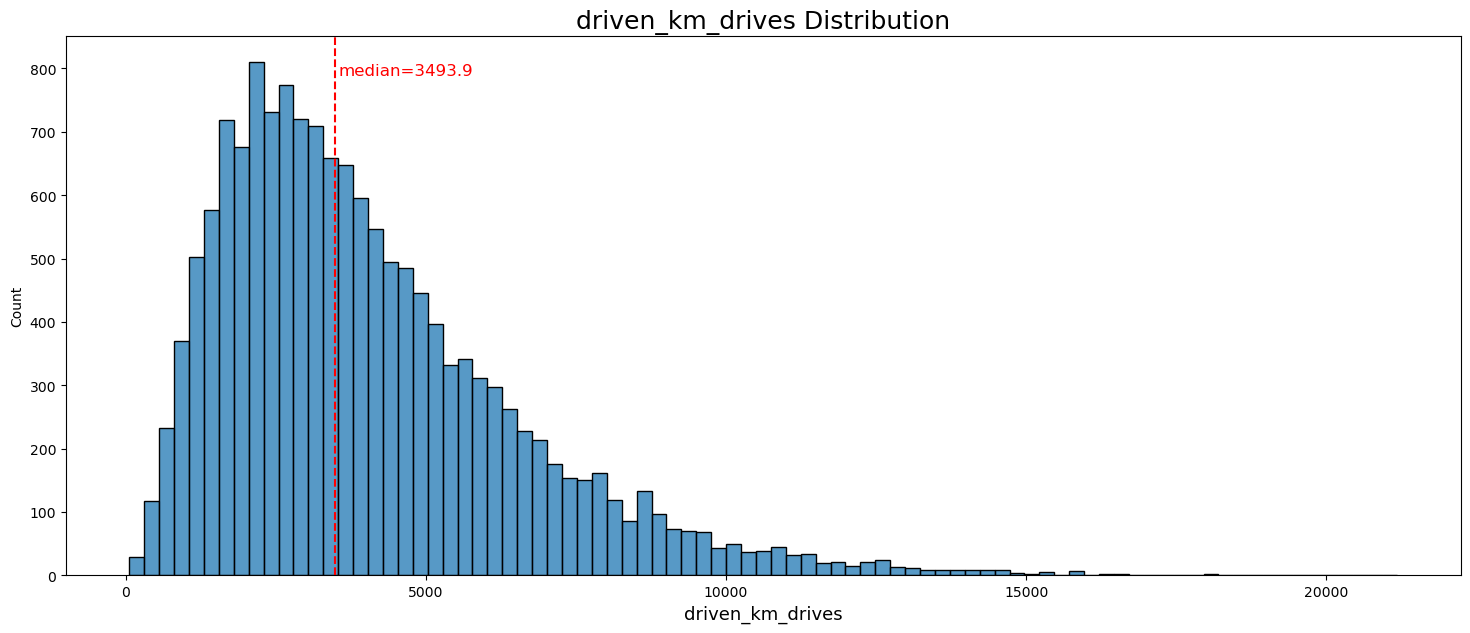

In [23]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='driven_km_drives')
plt.title('driven_km_drives Distribution',fontsize=18)
plt.axvline(df['driven_km_drives'].median(),color='red',linestyle='--')
plt.text(3550,790,'median=3493.9',color='red',fontsize=12)
plt.xlabel('driven_km_drives',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As we discovered in the analysis from the previous course, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

In [24]:
df['duration_minutes_drives'].describe().round(2)

count    14999.00
mean      1860.98
std       1446.70
min         18.28
25%        836.00
50%       1478.25
75%       2464.36
max      15851.73
Name: duration_minutes_drives, dtype: float64

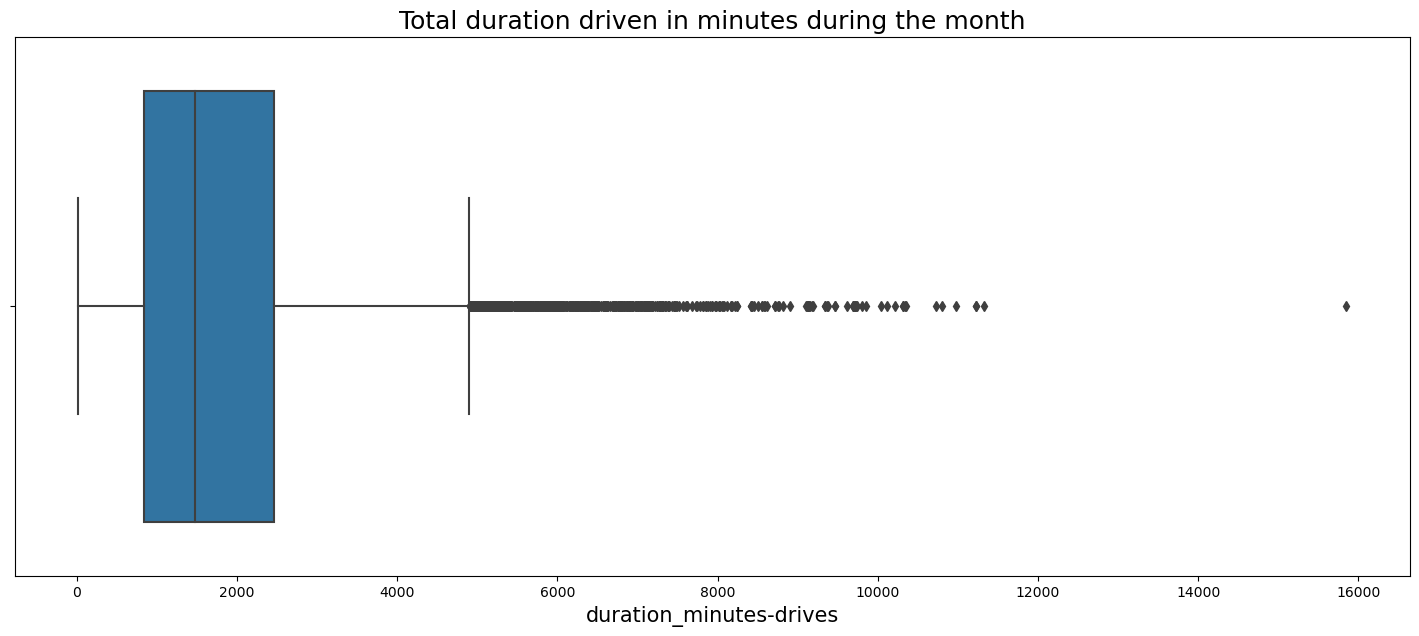

In [25]:
# Box plot
plt.figure(figsize=(18,7))
sns.boxplot(data=df,x='duration_minutes_drives')
plt.title('Total duration driven in minutes during the month',fontsize=18)
plt.xlabel('duration_minutes-drives',fontsize=15)
plt.show()

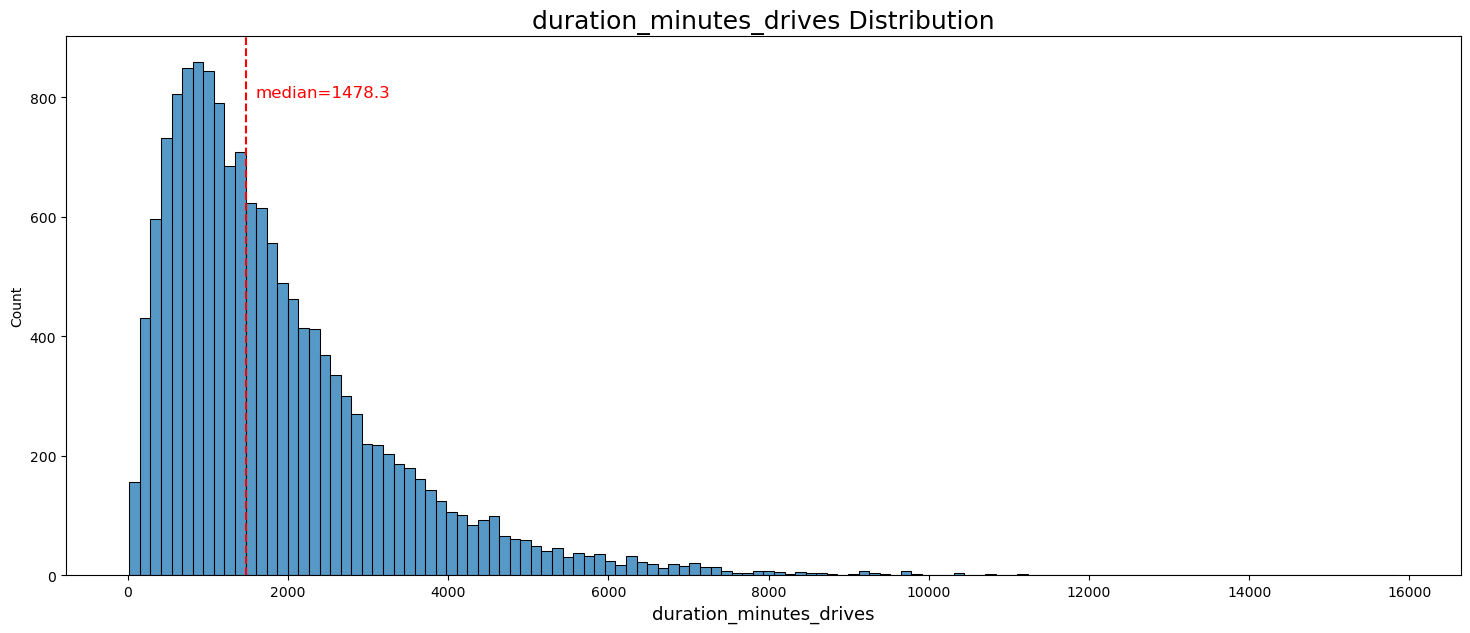

In [26]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='duration_minutes_drives')
plt.title('duration_minutes_drives Distribution',fontsize=18)
plt.axvline(df['duration_minutes_drives'].median(),color='red',linestyle='--')
plt.text(1600,800,'median=1478.3',color='red',fontsize=12)
plt.xlabel('duration_minutes_drives',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

In [27]:
df['activity_days'].describe().round(2)

count    14999.00
mean        15.54
std          9.00
min          0.00
25%          8.00
50%         16.00
75%         23.00
max         31.00
Name: activity_days, dtype: float64

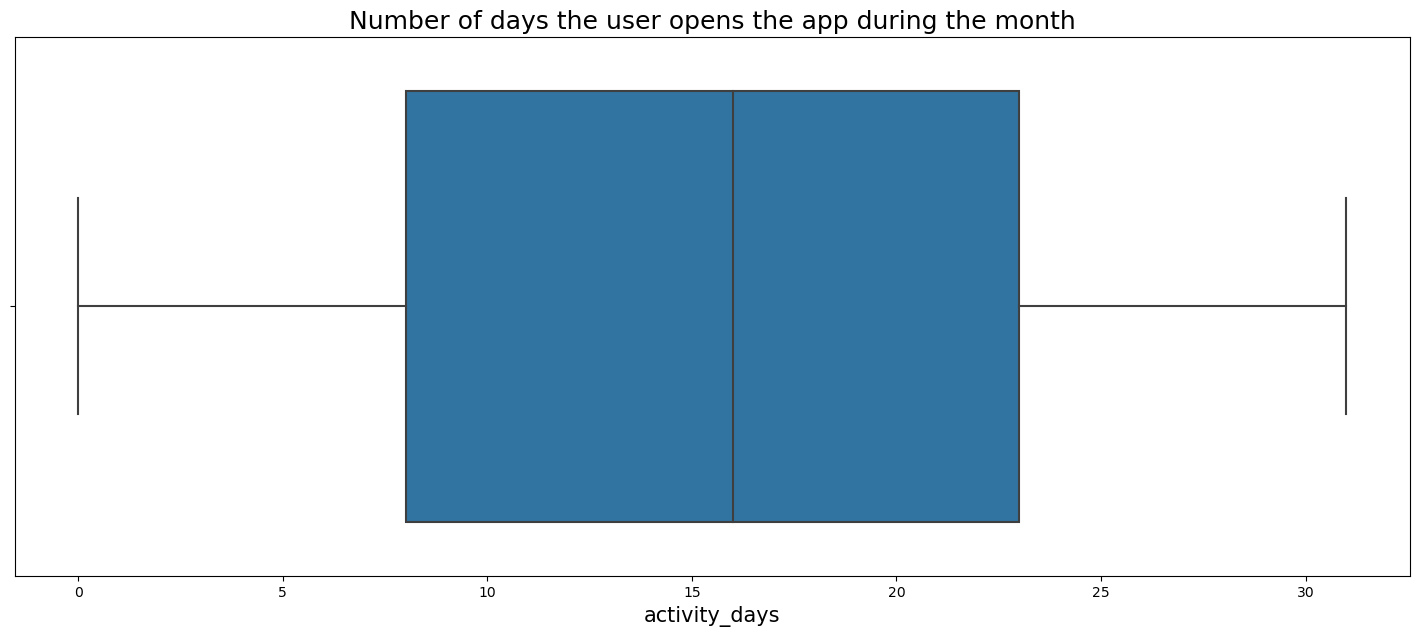

In [28]:
# Box plot
plt.figure(figsize=(18,7))
sns.boxplot(data=df,x='activity_days')
plt.title('Number of days the user opens the app during the month',fontsize=18)
plt.xlabel('activity_days',fontsize=15)
plt.show()

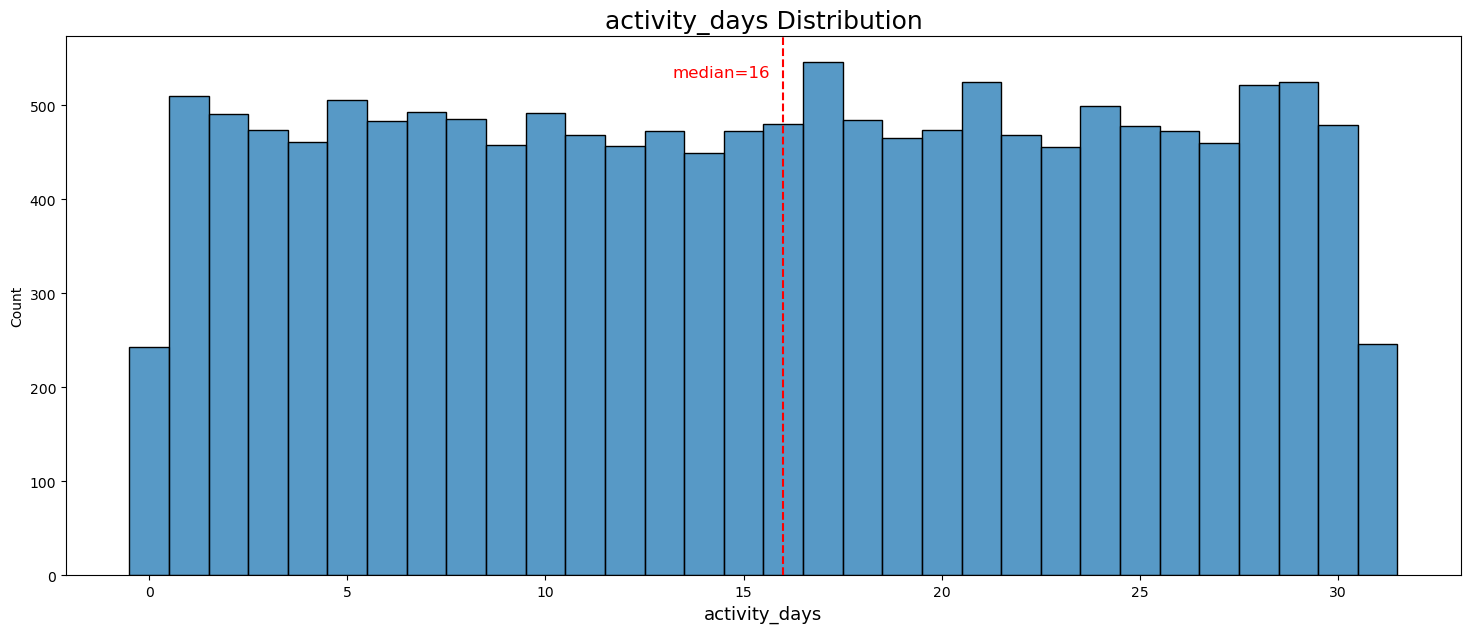

In [29]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='activity_days',discrete=True)
plt.title('activity_days Distribution',fontsize=18)
plt.axvline(df['activity_days'].median(),color='red',linestyle='--')
plt.text(13.2,530,'median=16',color='red',fontsize=12)
plt.xlabel('activity_days',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which we might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

In [30]:
df.driving_days.describe().round(2)

count    14999.00
mean        12.18
std          7.82
min          0.00
25%          5.00
50%         12.00
75%         19.00
max         30.00
Name: driving_days, dtype: float64

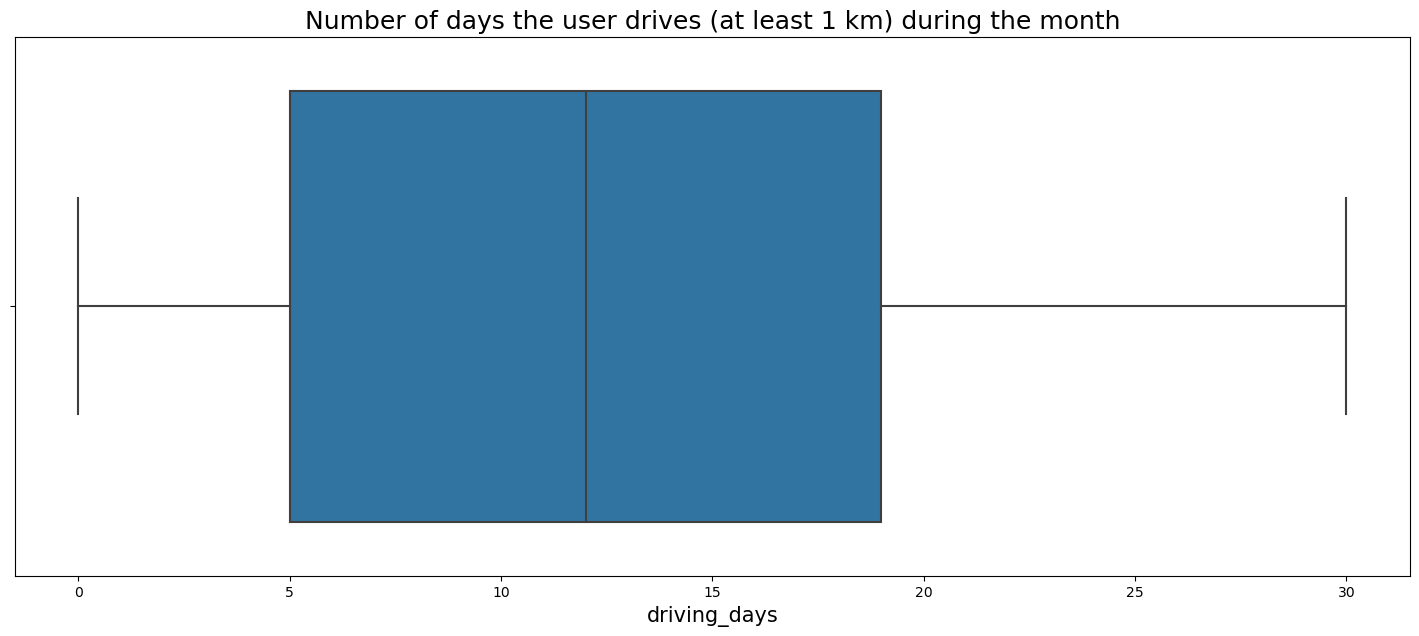

In [31]:
# Box plot
plt.figure(figsize=(18,7))
sns.boxplot(data=df,x='driving_days')
plt.title('Number of days the user drives (at least 1 km) during the month',fontsize=18)
plt.xlabel('driving_days',fontsize=15)
plt.show()

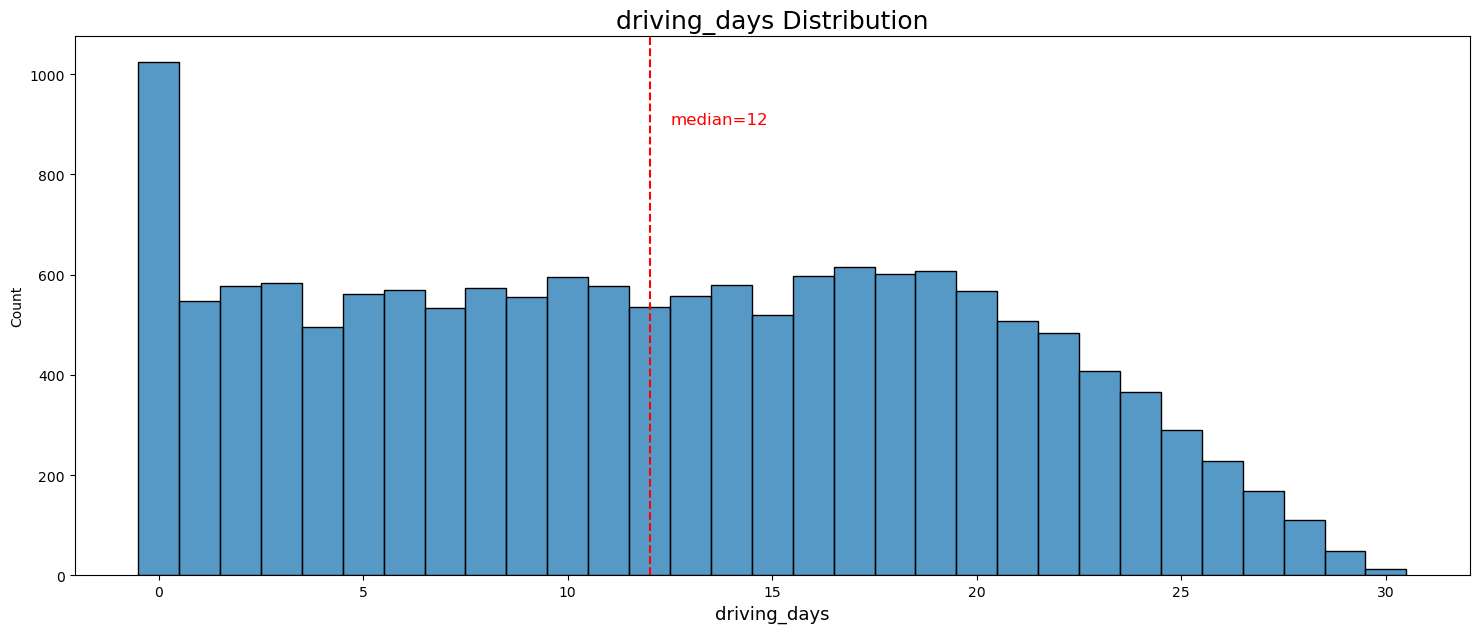

In [32]:
# Histogram
plt.figure(figsize=(18,7))
sns.histplot(data=df,x='driving_days',discrete=True)
plt.title('driving_days Distribution',fontsize=18)
plt.axvline(df['driving_days'].median(),color='red',linestyle='--')
plt.text(12.5,900,'median=12',color='red',fontsize=12)
plt.xlabel('driving_days',fontsize=13)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. We should flag this for further investigation later.

Let's check the relationship this time between 'activity days' & 'driving days' with a regression line created by a jointplot

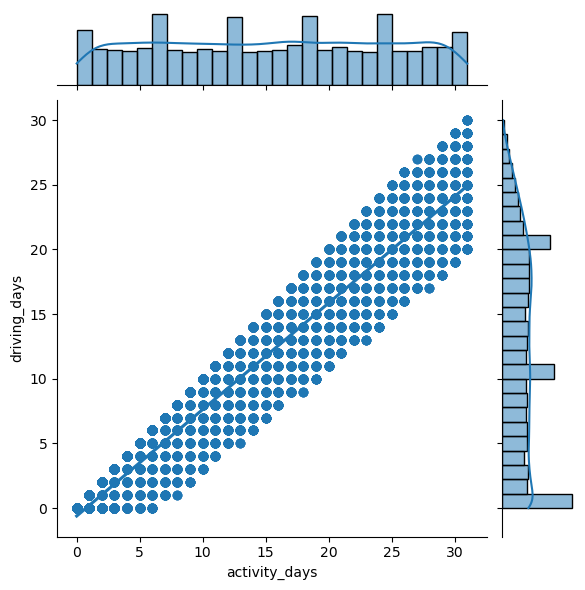

In [33]:
sns.jointplot(x=df['activity_days'],y=df['driving_days'],kind='reg')
plt.show()

Again, as we see we have a positive relationship as we expected. The reason is that when we have 1 driving day then it's sure that we will also have an activity day (but again the opposite is not necessary)

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so we do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

In [34]:
data = df.device.value_counts()
data

iPhone     9672
Android    5327
Name: device, dtype: int64

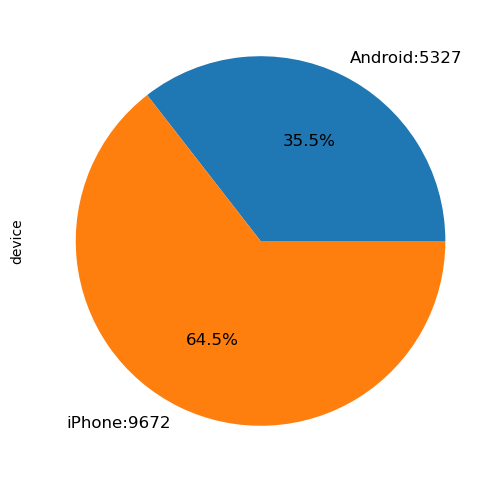

In [35]:
# Pie chart
plt.figure(figsize=(15,6))
df.groupby('device')['device'].count().plot.pie(labels=[f'{data.index[1]}:{data.values[1]}',f'{data.index[0]}:{data.values[0]}']
    ,autopct='%1.1f%%',fontsize=12)
plt.show()

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

This is also a categorical variable, and as such would not be plotted as a box plot. We should once again plot a pie chart instead.

In [36]:
d = df['label'].value_counts()
d

retained    11763
churned      2536
Name: label, dtype: int64

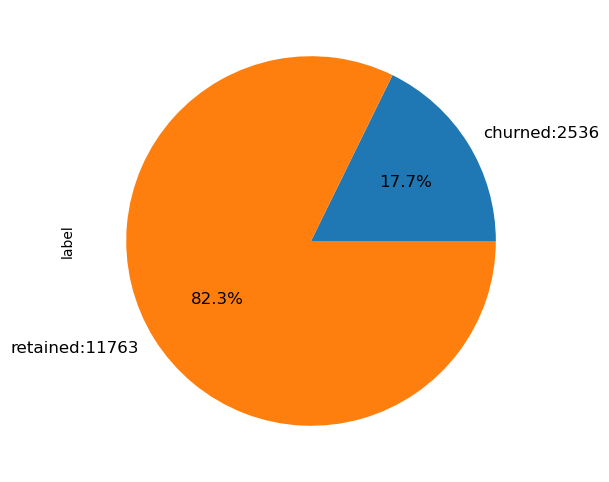

In [37]:
# Pie chart
plt.figure(figsize=(15,6))
df.groupby('label')['label'].count().plot.pie(labels=[f'{d.index[1]}:{d.values[1]}',f'{d.index[0]}:{d.values[0]}']
    ,autopct='%1.1f%%',fontsize=12)
plt.show()

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, we can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

We should plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `user_days`.

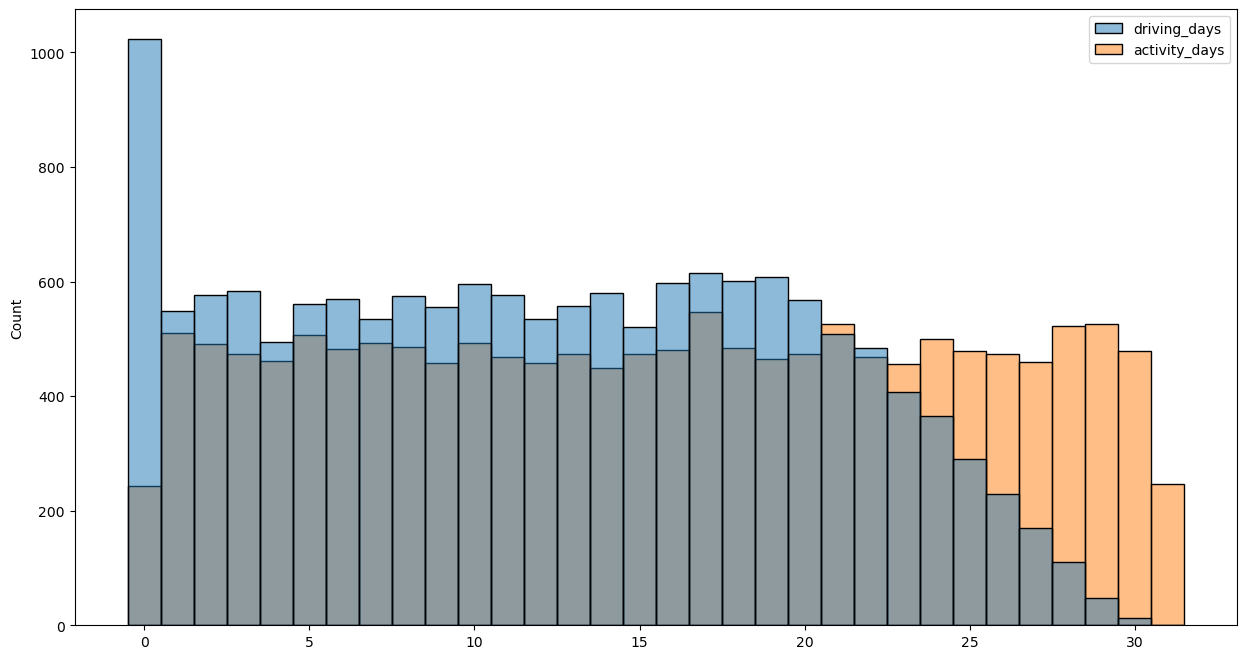

In [38]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot([df['driving_days'],df['activity_days']],discrete=True)
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

In [39]:
print('max driving days: ',df['driving_days'].max())
print('max activity days: ',df['activity_days'].max())

max driving days:  30
max activity days:  31


Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

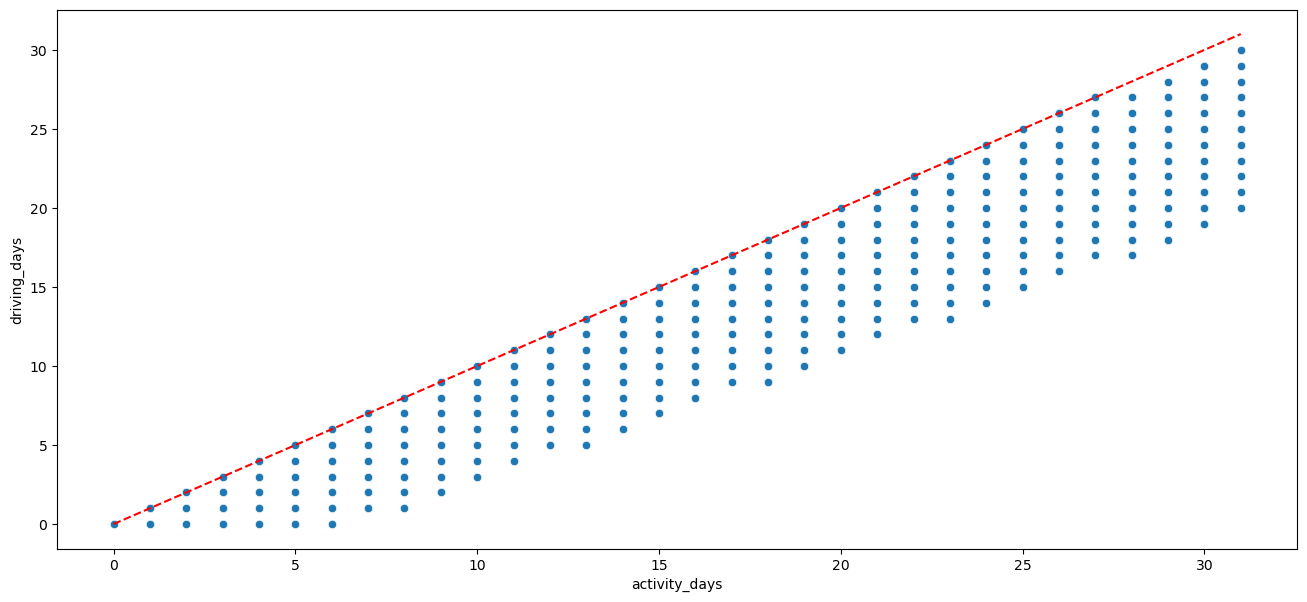

In [40]:
# Scatter plot
plt.figure(figsize=(16,7))
sns.scatterplot(x=df['activity_days'],y=df['driving_days'])
plt.plot([0,31],[0,31],color='red',linestyle='--')
plt.show()

As we can notice, there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Now we could plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

In [41]:
df.groupby(['device','label']).count()[['ID']].rename(columns = {'ID':'Count'})

Count
device  label          
Android churned     891
        retained   4183
iPhone  churned    1645
        retained   7580

In [42]:
android = df.loc[df['device'] == 'Android']
print(android[['device','label']].value_counts(normalize=True).round(2))
print("=====================================")
iPhone = df.loc[df['device']=='iPhone']
print(iPhone[['device','label']].value_counts(normalize=True).round(2))

device   label   
Android  retained    0.82
         churned     0.18
dtype: float64
device  label   
iPhone  retained    0.82
        churned     0.18
dtype: float64


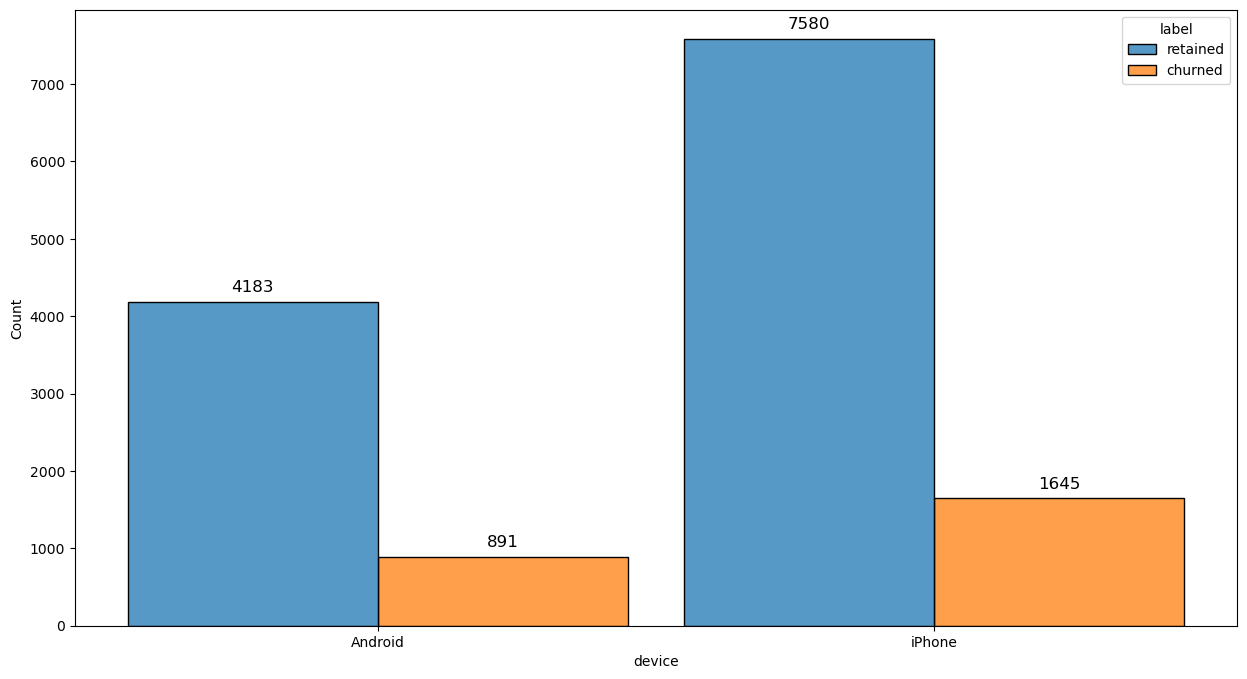

In [43]:
# Histogram
plt.figure(figsize=(15,8))
p=sns.histplot(data=df,x='device',hue='label',multiple='dodge',shrink=0.9)
for b in p.patches:
    p.annotate(str(round(b.get_height(),0)),
              (b.get_x() + b.get_width()/2, b.get_height()),
              ha='center',va='bottom',textcoords='offset points',xytext=(0,5),fontsize=12)
plt.show()

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

In the previous course, we discovered that the median distance driven last month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. We should examine this further.

1. First, we have to create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

2. Second, we should call the `describe()` method on the new column and examine the results.

In [44]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
df.km_per_driving_day.describe().round(2)

count    14999.00
mean          inf
std           NaN
min          3.02
25%        167.28
50%        323.15
75%        757.93
max           inf
Name: km_per_driving_day, dtype: float64

What do we notice? The mean value is infinity, the standard deviation is NaN, and the max value is infinity. Why is this?

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. We need to convert these values from infinity to zero. We can use `np.inf` to refer to a value of infinity.

2. We again should call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [45]:
df.loc[df['km_per_driving_day'] == np.inf]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
13,13,retained,80,64,132.830506,3154,39,16,8531.248070,6324.273457,1,0,Android,inf
14,14,churned,72,66,401.351809,2524,54,24,5922.811202,2227.280393,0,0,Android,inf
56,56,churned,150,127,187.708346,2028,208,132,1396.461977,496.620891,0,0,iPhone,inf
64,64,retained,4,3,113.818787,1830,233,0,9624.439528,3213.049582,6,0,Android,inf
81,81,churned,26,23,83.166886,2118,335,0,944.204641,455.026306,2,0,Android,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,14881,retained,174,151,181.187455,2255,103,31,2647.541976,561.344796,2,0,iPhone,inf
14957,14957,retained,24,24,42.953281,762,17,0,1466.793380,597.834311,2,0,Android,inf
14985,14985,churned,53,43,118.385655,65,23,49,1661.143357,1161.205518,4,0,iPhone,inf
14988,14988,churned,13,11,41.804981,770,132,87,1533.521450,823.418616,0,0,Android,inf


In [46]:
# 1. Converting infinite values to zero
df['km_per_driving_day'] = np.where(df['km_per_driving_day'] == np.inf,0,df['km_per_driving_day'])

# 2. Confirming that it worked
df['km_per_driving_day'].describe().round(2)

count    14999.00
mean       578.96
std       1030.09
min          0.00
25%        136.24
50%        272.89
75%        558.69
max      15420.23
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, we should to disregard rows where the distance in this column is greater than 1,200 km.

Then, we will plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. 

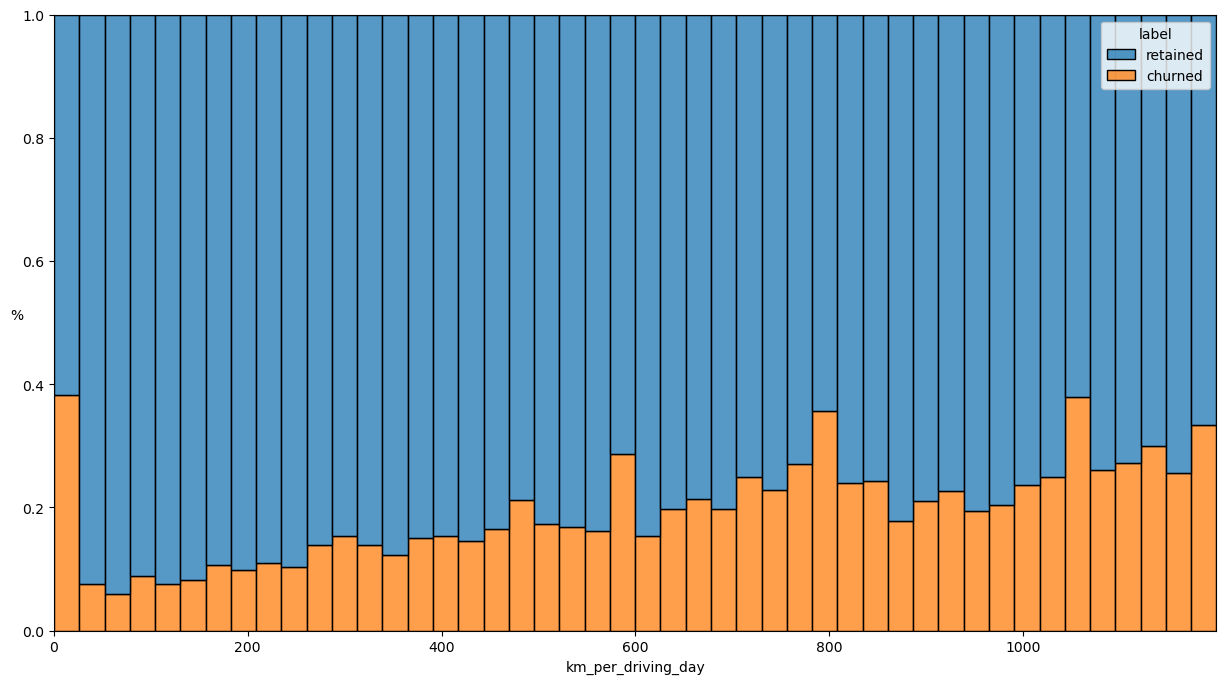

In [47]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df[df['km_per_driving_day'] <= 1200], x = 'km_per_driving_day', hue = 'label', multiple ='fill')
plt.ylabel('%',rotation=0)
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

We will create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

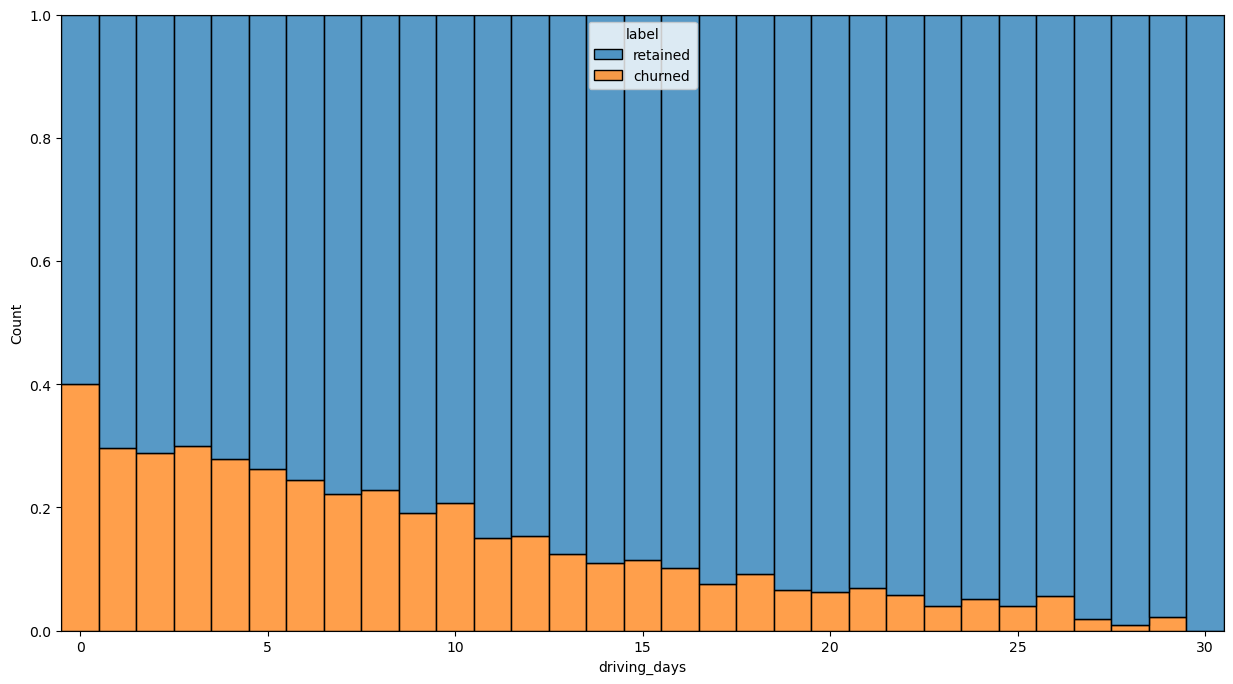

In [48]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data = df[df['km_per_driving_day'] <= 1200],x='driving_days',hue='label',multiple='fill',discrete=True)
plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **Proportion of sessions that occurred in the last month**

Let's create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [49]:
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

What is the median value of the new column?

In [50]:
med = round(df['percent_sessions_in_last_month'].median(),2)
med

0.42

Now, let's create a histogram depicting the distribution of values in this new column.

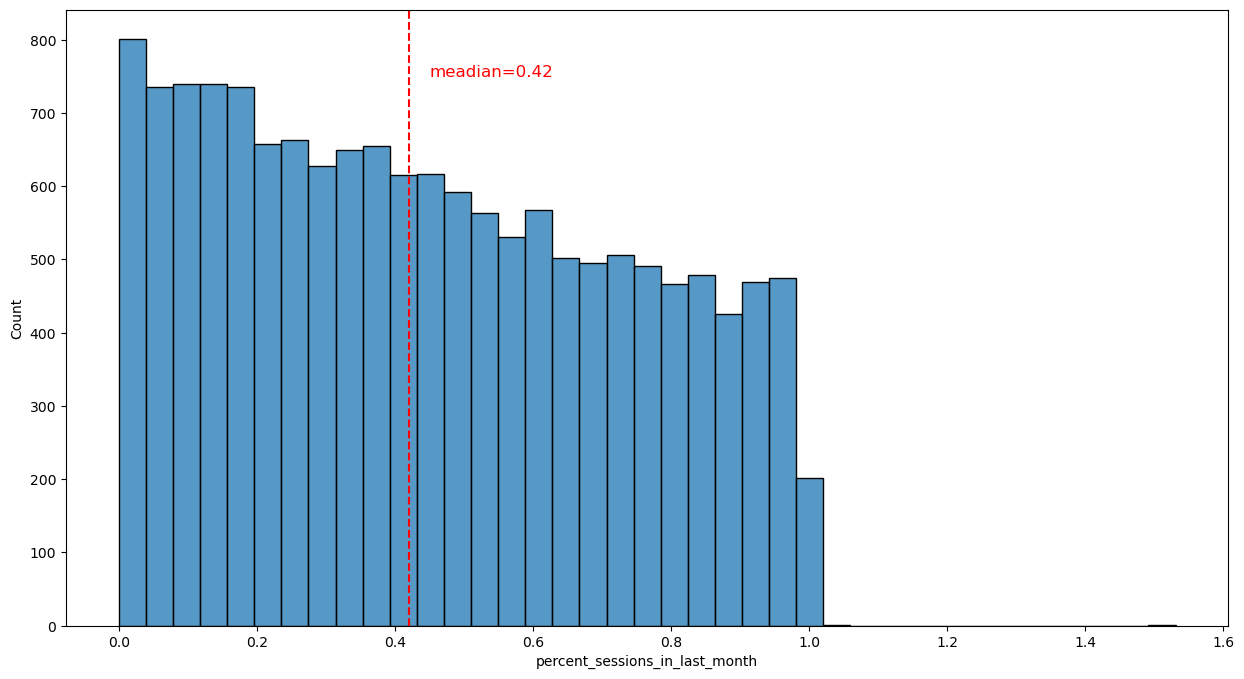

In [51]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data = df, x= 'percent_sessions_in_last_month')
plt.axvline(med, color='red',linestyle='--')
plt.text(0.45,750,f'meadian={med}',color='red',fontsize=12)
plt.show()

Again, what's the median of the `n_days_after_onboarding` variable?

In [52]:
m = df['n_days_after_onboarding'].median()
m

1741.0

In [53]:
round(1741/365,1)

4.8

Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

We should make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month.

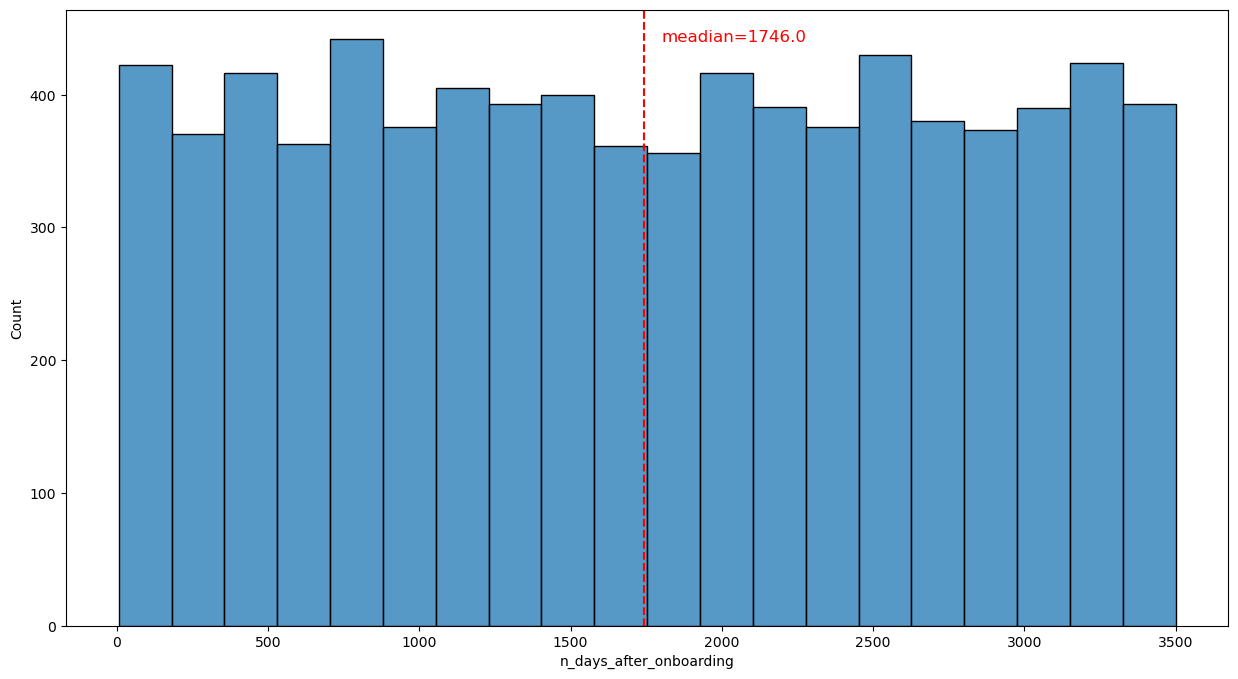

In [54]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data = df[df['percent_sessions_in_last_month'] >= 0.40], x='n_days_after_onboarding')
M = df.loc[df['percent_sessions_in_last_month'] >= 0.4]['n_days_after_onboarding'].median()
plt.axvline(m, color='red',linestyle='--')
plt.text(1800,440,f'meadian={M}',color='red',fontsize=12)
plt.show()

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Task 3b. Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what we'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

Therefore, we will write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.



In [55]:
def threshold(x):
    perc_95 = np.percentile(x,95)
    x.loc[x > perc_95] = perc_95
    return x

Next, we will apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [56]:
convert_outliers = ['sessions','drives','total_sessions','driven_km_drives','duration_minutes_drives']
for i in convert_outliers:
    print(i, round(np.percentile(df[i],95),2))

sessions 243.0
drives 201.0
total_sessions 454.36
driven_km_drives 8889.79
duration_minutes_drives 4668.9


In [57]:
# We are making a copy of our original dataset before imputing changes for good practice.
df_cleared = df.copy()
df_cleared.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266


In [58]:
for i in convert_outliers:
    threshold(df_cleared[i])

Now we will call `describe()` to see if our change worked.

In [59]:
df_cleared.describe().round(2)

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,7499.00,76.57,64.06,184.03,1749.84,121.61,29.67,3939.63,1789.65,15.54,12.18,578.96,0.45
std,4329.98,67.30,55.31,118.60,1008.51,148.12,45.39,2216.04,1222.71,9.00,7.82,1030.09,0.29
min,0.00,0.00,0.00,0.22,4.00,0.00,0.00,60.44,18.28,0.00,0.00,0.00,0.00
25%,3749.50,23.00,20.00,90.66,878.00,9.00,0.00,2212.60,836.00,8.00,5.00,136.24,0.20
50%,7499.00,56.00,48.00,159.57,1741.00,71.00,9.00,3493.86,1478.25,16.00,12.00,272.89,0.42
75%,11248.50,112.00,93.00,254.19,2623.50,178.00,43.00,5289.86,2464.36,23.00,19.00,558.69,0.69
max,14998.00,243.00,201.00,454.36,3500.00,1236.00,415.00,8889.79,4668.90,31.00,30.00,15420.23,1.53


#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

It seems that the more deeply we explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

### **Task 4a. Results and evaluation**

Having built visualizations in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

**Pro tip:** Put yourself in your client's perspective. What would they want to know?


**Answer:**

**What I have learned so far from the activity?**  
* There is missing data in the user churn label, so we might need further data processing before further analysis.
* There are many outlying observations for drives, so we might consider a variable transformation to stabilize the variation.
* The number of drives and the number of sessions are both strongly correlated, so they might provide redundant information when we incorporate both in a model.
* On average, retained users have fewer drives than churned users.

**What questions did I form during my analysis?**  
My other questions are:
* What could cause the Nan values and outliers in my data? The Waze data owners could help me understand the data pipeline to examine the outliers and their existence's reason. As for the NaN values, our previous analysis didn't reveal any certain reasons for their existence. Perhaps the Waze data owners could help us with that issue.
* Generated from my findings, the most important question that would help me to dig deeper into the dataset would be why it appears that the more distance a user travels, the more likely to churn, while the more days a user uses the app the less likely to churn. While the second part of the question reveals the satisfaction of the users using the app, it comes contradictory with the first part as we may safely assume that more distance leads to more use therefore it also should lead to less churn.
* Another question worth examining is why so many long-time users suddenly used the app so much in the last month. Waze will also need to check why the variable of driving days seems to lack the 31st day, unlike the activity days variable which has the count for each day of the month. We may assume it's just because no one drove all 31 days of the month, but in data with ~15,000 observations, this may be difficult to happen. Therefore, we may need to check with the Waze data team, if the observations of the driving days variable, and activity days variable were collected in the same month.
* Finally, the answer to the question of what is the user demographic for retained users and churned users, would help us build the user profile and to understand what caused them to churn.

**What are the key factors of my analysis for my client?**  
My client would likely want to know what makes a user churn, to be able to proceed in actions that would reduce or entirely end those factors. For this purpose, knowing the variables' relationship would help my client to make adjustments to influence each variable according to the goal of reducing churn. The client should be informed that the churn rate is approximately 18% and that is consistent between the device categories. That means that the reasons for a user to churn do not relate to the type of his device as in a scenario that it would, the software team should check for issues that the app is facing in the device that has the most churn users. My client Should also be aware of the finding that the more distance a user covers the more likely to churn while the more he uses the app the less likely to churn. Finally, another worth mentioning finding is that all users no matter the duration of their app usage, appear to have a very high rate of sessions during the last month, a fact that raises questions.

Let's examine some further aspects of our dataset with some more blocks of code

In [60]:
df_cleared.head(3)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186


As at least one session equals one activity day, we will create a sessions_per_day variable, which will include the average occurrences per activity_day within the last month.

As we have users with zero activity days, inf values will appear in our new column and we will have to replace them with zeroes.

In [61]:
# We create a sessions_per_day variable, which will include the average occurrences per activity_day within the last month.
df_cleared['sessions_per_day'] = round(df_cleared['sessions'] / df_cleared['activity_days'],0)
df_cleared['sessions_per_day'].loc[df_cleared['sessions_per_day'] == np.inf] = 0
df_cleared.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,sessions_per_day
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,0.953670,9.0
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,0.406856,10.0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0.841186,8.0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0.724968,7.0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,0.499266,3.0


In [62]:
df_cleared['sessions_per_day'].describe().round(2)

count    14997.00
mean         9.82
std         20.75
min          0.00
25%          2.00
50%          4.00
75%          9.00
max        243.00
Name: sessions_per_day, dtype: float64

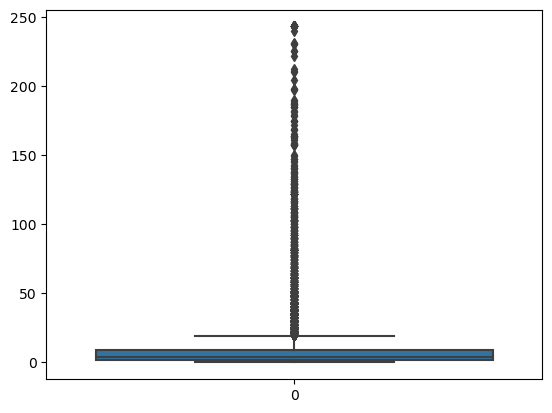

In [63]:
sns.boxplot(df_cleared['sessions_per_day'])
plt.show()

At first sight, we observe a large amount of outliers. We know from before that the max value of the session variable is 243. As we see, 243 is also the max value of the sessions_per_day, indicating that there are users who have done 243 sessions in one day. Is that normal or even considered possible?

Now let's check the relationship rule between the sessions and the activity days. We expect to see that 1 activity day has at least 1 session, or on the opposite, 1 or more sessions have at least 1 activity day.

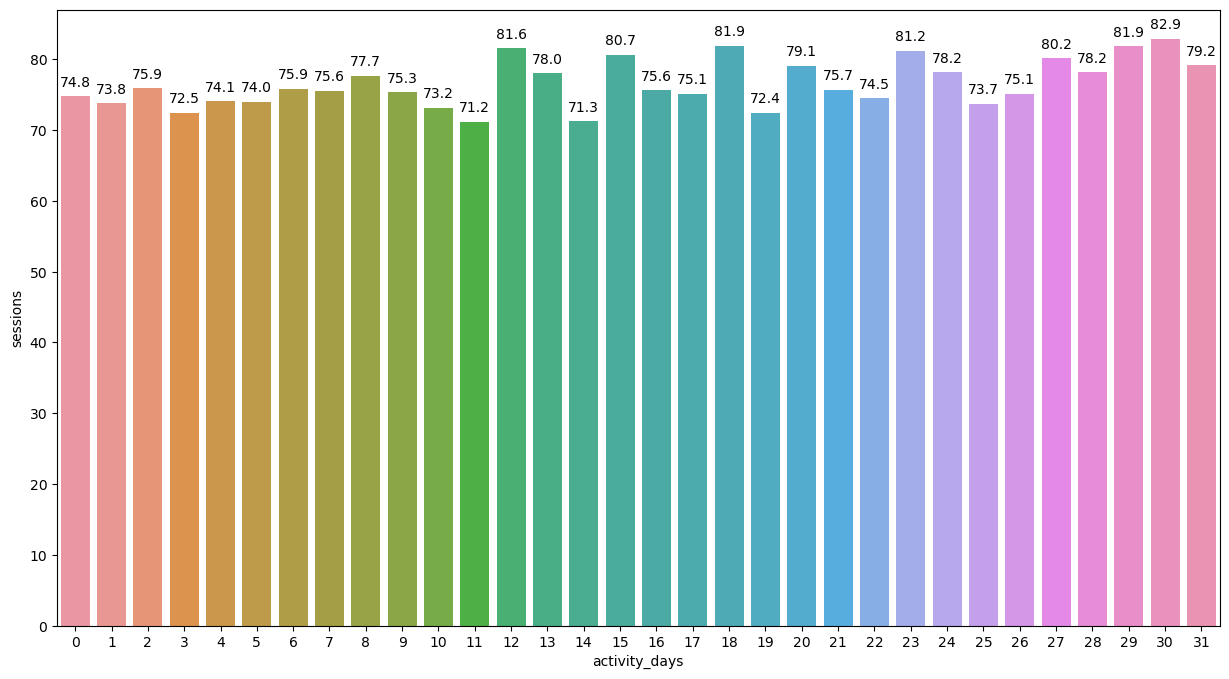

In [64]:
plt.figure(figsize=(15,8))
p=sns.barplot(data=df_cleared,x='activity_days',y='sessions',ci=False)
for b in p.patches:
    p.annotate(str(round(b.get_height(),1)),
              (b.get_x() + b.get_width()/2, b.get_height()),
              ha='center',va='bottom',textcoords='offset points',xytext=(0,5))

What we see in the above visualization is a strange result. It seems that we have ~75 occurrences on average, of users opening the app which corresponds to zero activity days. This is a point that requires further investigation.

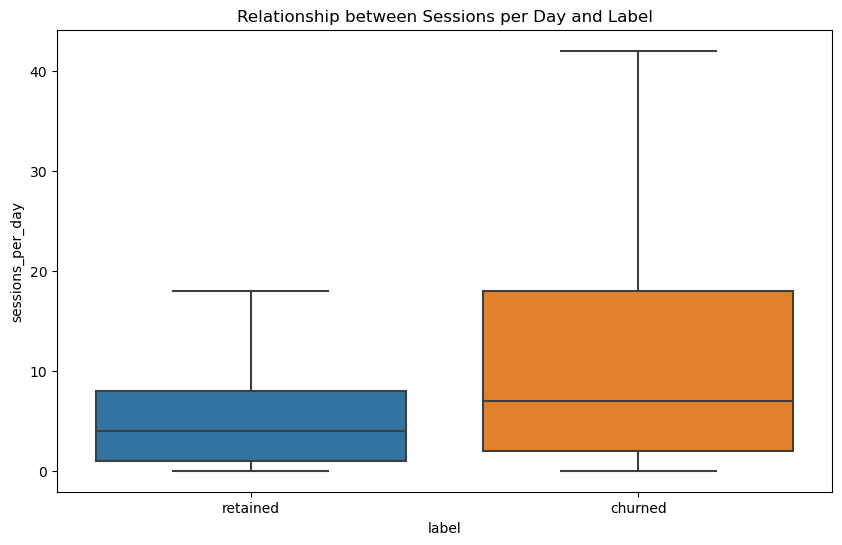

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleared, x='label', y='sessions_per_day',showfliers = False)
plt.title('Relationship between Sessions per Day and Label')
plt.show()

In [66]:
df_cleared.groupby('label')['sessions_per_day'].median()

label
churned     7.0
retained    4.0
Name: sessions_per_day, dtype: float64

While we found that the users with more driving days per month are less likely to churn giving us the view that the more a user uses the app the better, our finding about the sessions per day comes to contradictory as it seems that retained users are gathered in less sessions per day with a median of 4 while churned sessions per day median is 7.

Drives and Driving Days relationship check

In [67]:
df_cleared.loc[(df_cleared['driving_days'] == 0)&(df_cleared['drives'] > 0)]

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_last_month,sessions_per_day
13,13,retained,80,64,132.830506,3154,39,16,8531.248070,4668.899349,1,0,Android,0.0,0.602271,80.0
14,14,churned,72,66,401.351809,2524,54,24,5922.811202,2227.280393,0,0,Android,0.0,0.179394,0.0
56,56,churned,150,127,187.708346,2028,208,132,1396.461977,496.620891,0,0,iPhone,0.0,0.799112,0.0
64,64,retained,4,3,113.818787,1830,233,0,8889.794236,3213.049582,6,0,Android,0.0,0.035144,1.0
81,81,churned,26,23,83.166886,2118,335,0,944.204641,455.026306,2,0,Android,0.0,0.312624,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14881,14881,retained,174,151,181.187455,2255,103,31,2647.541976,561.344796,2,0,iPhone,0.0,0.960331,87.0
14957,14957,retained,24,24,42.953281,762,17,0,1466.793380,597.834311,2,0,Android,0.0,0.558747,12.0
14985,14985,churned,53,43,118.385655,65,23,49,1661.143357,1161.205518,4,0,iPhone,0.0,0.447689,13.0
14988,14988,churned,13,11,41.804981,770,132,87,1533.521450,823.418616,0,0,Android,0.0,0.310968,0.0


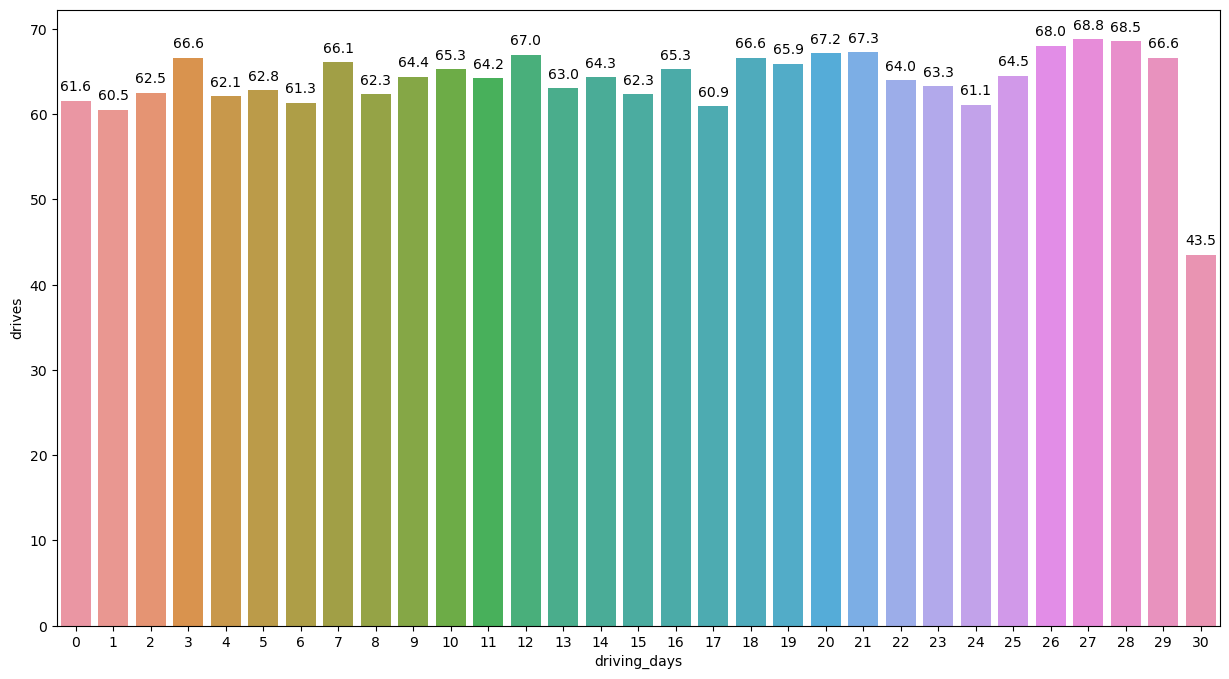

In [68]:
plt.figure(figsize=(15,8))
p=sns.barplot(data=df_cleared,x='driving_days',y='drives',ci=False)
for b in p.patches:
    p.annotate(str(round(b.get_height(),1)),
              (b.get_x() + b.get_width()/2, b.get_height()),
              ha='center',va='bottom',textcoords='offset points',xytext=(0,5))

How is possible for a user to have zero driving days and >0 drives? If the drives column contains information about the number of drives that users drove at least 1km and the driving days refers to days of the month where at least 1 drive occurred, the relationship of those variables should be at least 1 drive equals 1 driving day.

We can creat a duration per hour view by using the duration_minutes_drives.

The above observation cannot be explained by reason and it seems that the issue generator is the violation of the relationship rule between the drives and driving days as columns calculated by driving day have been impacted by this discrepancy.

We need to further investigate those out of reason values as we may have to proceed in further data cleaning before importing the data to a model.

### **Task 4b. Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

4. What percentage of users churned and what percentage were retained?

5. What factors correlated with user churn? How?

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?


**Answer:**  
1) The types of distributions we met during our analysis were right-skewed distributions & uniform distributions.   
* A right-skewed distribution, also known as a positively skewed distribution, reveals that the majority of the data points are concentrated on the left side of the distribution, while the tail extends towards the right. In other words, the distribution is elongated towards higher values, and the mean is typically greater than the median.  
* A uniform distribution is characterized by equally distributed elements among the given range.  

2) There are a lot of findings that indicate problematic data. 
* First, the dataset contains 700 NaN values in the label column.
* Secondly, as we found in our previous analysis, there are covered distances in km that extend over half the circumference of the earth.
* Another point could be that we do not have even 1 user that drove all 31 days of the month within almost 15 thousand observations while we do have observations for every count of days for the activity_days variable. Are we sure that the observations for both variables occurred in the same month?
* We also have big session percentages of the total_sessions that occurred during the last month even for users who have been on board for almost 10 years.

3) Finally, from further analysis we found out that there are ~62 drives on average without even 1 driving day, an abnormal finding as the relationship rule should be 1 driving day for at least 1 drive. We have the same situation regarding the sessions as we found that we have ~75 sessions on average which corresponds to zero activity days.

4) 18% of users have churned and the rest 82% have been retained.

5) We see that churn is correlated with the number of driving days and the number of km that a user drives. More specifically, it seems that the more driving days a user has the less likely to churn while the more distance he covers in km the more likely to churn. In addition, during my further analysis, I found that the more sessions per day we have the more likely to churn.

6) The n_days_after_onboarding variable distribution is a uniform distribution indicating that all users no matter their onboarding days are equally represented in the dataset.
